## Import the libraries

In [2]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    

In [3]:
data = pd.read_csv("crime_data.csv");
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## Normalize the data

In [5]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
data_norm = pd.DataFra## Normalize the datame(MM.fit_transform(data.iloc[:, 1:]))
data_norm.columns = list(data.iloc[:, 1:])

In [6]:
data_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [7]:
X = data_norm.values
X   

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

### Getting the best epsilon value

In [8]:
from sklearn.neighbors import NearestNeighbors  

In [9]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  

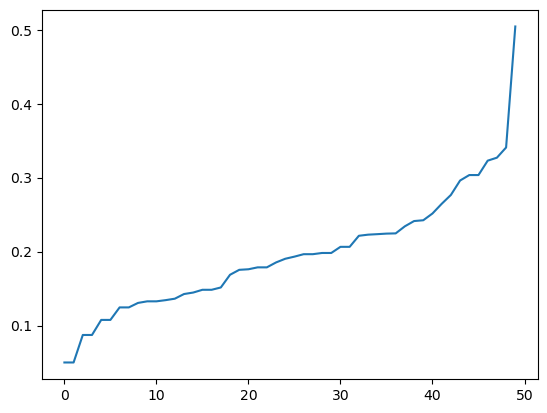

In [10]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The curve shifts around 0.35. So we can take eps value as **0.35**

## Fitting the model

In [11]:
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(X) 

DBSCAN(eps=0.35)

In [12]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [13]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [14]:
pd.set_option("display.max_rows", None)  

In [15]:
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [16]:
data1 = pd.concat([data,cl],axis=1)  

In [17]:
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [18]:
import matplotlib.pyplot as plt
plt.style.use('classic') 

Text(0.5, 1.0, 'Clusters using DBScan')

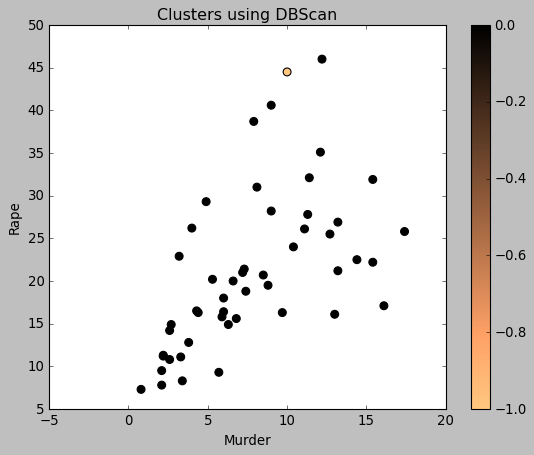

In [19]:
data1.plot(x="Murder",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

In [20]:
dl = dbscan.labels_

In [21]:
import sklearn
sklearn.metrics.silhouette_score(X, dl) 

0.21033337025958487

## Verifying with KMeans clustering method

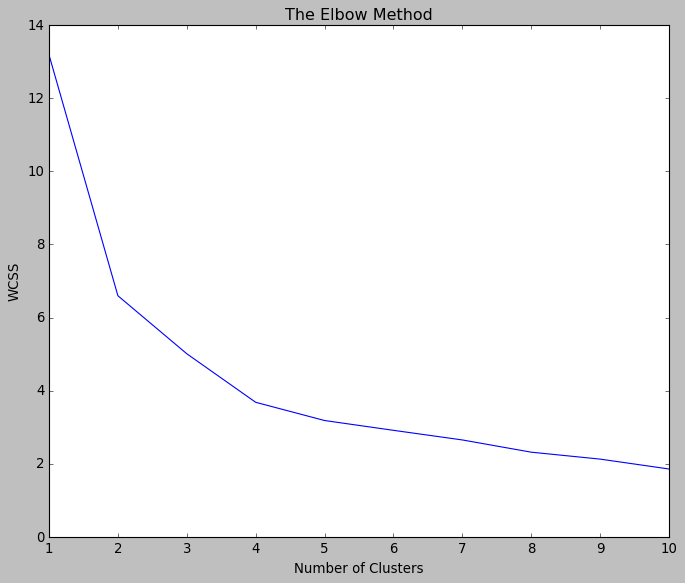

In [22]:
## Verifying with KMeans clustering methodfrom sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [23]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(X)  

In [24]:
y_kmeans

array([0, 3, 3, 0, 3, 3, 2, 2, 3, 0, 2, 1, 3, 2, 1, 2, 1, 0, 1, 3, 2, 3,
       1, 0, 2, 1, 1, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 3, 2,
       1, 2, 2, 1, 1, 2])

In [25]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

,Kcluster
0,0
1,3
2,3
3,0
4,3
5,3
6,2
7,2
8,3
9,0


In [26]:
data2 = pd.concat([data1,cl1],axis=1) 
data2 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,Kcluster
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,-1,3
2,Arizona,8.1,294,80,31.0,0,3
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,0,3
5,Colorado,7.9,204,78,38.7,0,3
6,Connecticut,3.3,110,77,11.1,0,2
7,Delaware,5.9,238,72,15.8,0,2
8,Florida,15.4,335,80,31.9,0,3
9,Georgia,17.4,211,60,25.8,0,0


Text(0.5, 1.0, 'Clusters using KMeans')

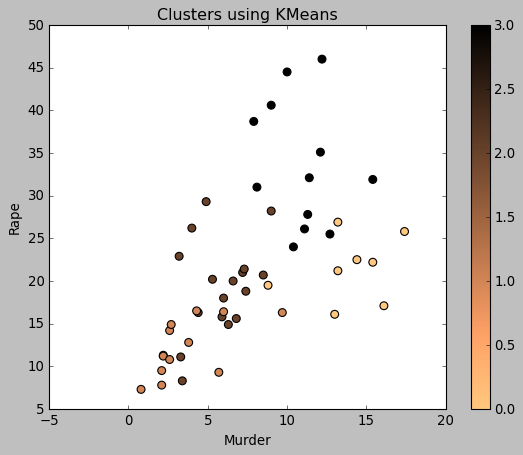

In [27]:
data2.plot(x="Murder",y ="Rape",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')   

In [28]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.34089035600743633

**KMeans method gave a higher Silhouette score than the DBSCAN method.**